In [55]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

## Build DataFrame 

In [56]:
df = pd.read_csv('data_LR/airbnbData_train.csv')
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,False,True,True,True,False,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,...,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,True,True,True,False,-4.685756,-0.430024,-0.112284,-0.112284,0.067470,...,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,False,True,True,True,False,0.578052,-2.473964,-0.112284,-0.112284,0.605041,...,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,False,True,False,0.578052,1.010024,-0.112284,-0.112284,-0.470102,...,-0.576550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,True,True,True,False,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,...,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,False,True,True,True,True,0.578052,1.010024,-0.054298,-0.054298,-0.470102,...,-1.562519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28018,False,True,True,True,False,0.057456,0.499039,-0.120567,-0.120567,1.680184,...,-0.083566,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28019,True,True,True,True,True,0.520208,0.963571,-0.070865,-0.070865,-0.470102,...,-1.562519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28020,True,True,True,True,False,-0.000388,1.010024,-0.095716,-0.095716,0.067470,...,0.902404,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Define Label and Features

In [57]:
X = df.drop('host_is_superhost', axis='columns')
y = df['host_is_superhost']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Train, Test, and Evaluate Default Model

In [59]:
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
proba_predictions_default = model_default.predict_proba(X_test)[:, 1]
class_label_predictions_default = model_default.predict(X_test)

In [61]:
acc_score_default = accuracy_score(y_test, class_label_predictions_default)
acc_score_default

0.8094898323225116

#### Confusion Matrix for Default Model

In [62]:
confusion_matrix(y_test, class_label_predictions_default)

array([[2022,   92],
       [ 442,  247]])

## Perform Model Selection w/ GridSearchCV()

#### Set Up Parameter Grid 

In [63]:
cs = [10**i for i in range(-5, 5)]

param_grid = { 'C': cs }
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#### Find Optimal Hyperparameter w/ Grid Search Cross-Validation

In [64]:
print('Running Grid Search...')

model = LogisticRegression(max_iter=1000)

grid = GridSearchCV(model, param_grid, cv=5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [65]:
best_C = grid_search.best_params_["C"]
best_C

1000

## Train, Test, and Evaluate Optimal Model 

In [66]:
model_best = LogisticRegression(C=best_C, max_iter=1000)
model_best.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000)

In [67]:
proba_predictions_best = model_best.predict_proba(X_test)[:, 1]
class_label_predictions_best = model_best.predict(X_test)

In [68]:
acc_score_best = accuracy_score(y_test, class_label_predictions_best)
acc_score_best

0.8080627898679986

#### Confusion Matrix for Optimal Model

In [69]:
confusion_matrix(y_test, class_label_predictions_best)

array([[2017,   97],
       [ 441,  248]])

## Plot Precision-Recall Curves for Both Models

In [70]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

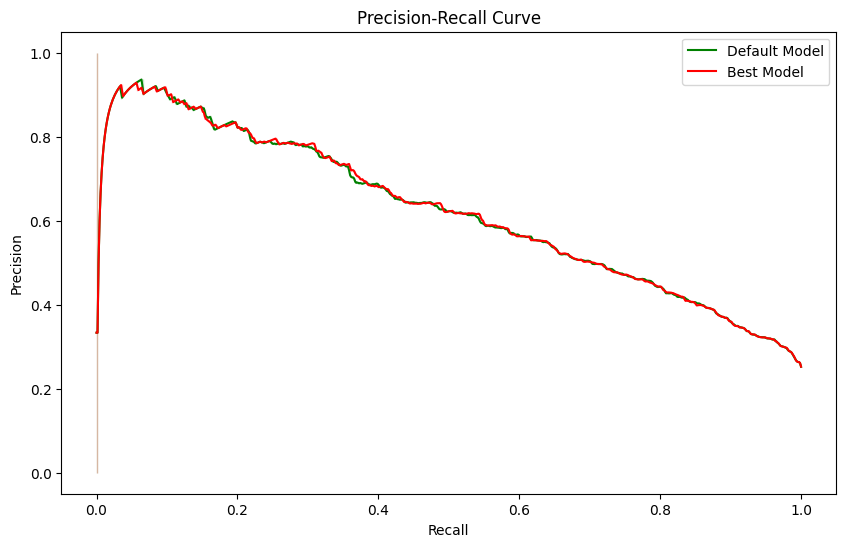

In [71]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=recall_default, y=precision_default, color='green', label='Default Model')

sns.lineplot(x=recall_best, y=precision_best, color='red', label='Best Model')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

plt.show()

## Plot ROC Curves and Compute the AUC for Both Models

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [73]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

#### ROC Curve for Default Hyperparameter:

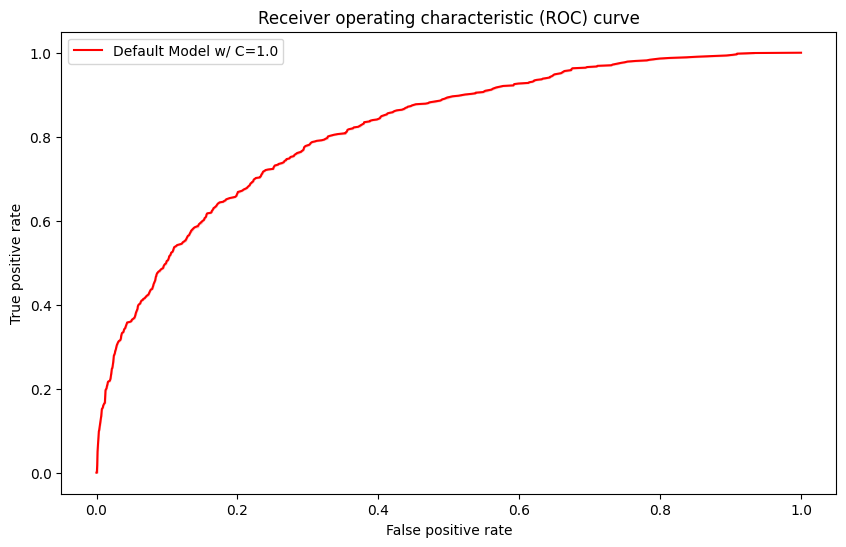

In [74]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=fpr_default, y=tpr_default, color='red', label='Default Model w/ C=1.0')
                                                                                     
plt.title('Receiver operating characteristic (ROC) curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()

plt.show()

#### ROC Curve for Best Hyperparameter:

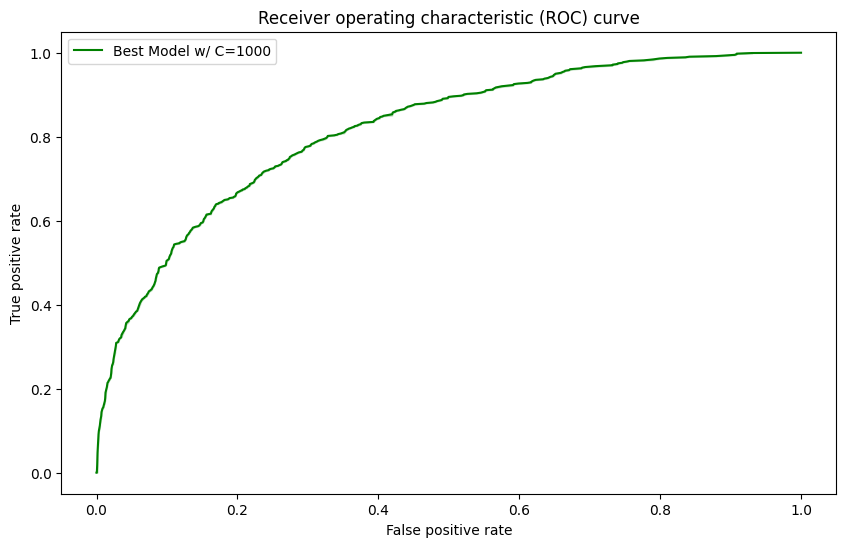

In [75]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=fpr_best, y=tpr_best, color='green', label=f'Best Model w/ C={best_C}')
                                                                                     
plt.title('Receiver operating characteristic (ROC) curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()

plt.show()

#### Compare AUC Curves

In [76]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.8171029270616926
0.8172718197708826
